In [0]:
# Base project path
base_path = "dbfs:/FileStore/tables/FileStores/flight_project"

# Read Gold tables
flights_by_airline_df = spark.read.format("delta") \
    .load(f"{base_path}/gold/flights_by_airline")

monthly_trends_df = spark.read.format("delta") \
    .load(f"{base_path}/gold/monthly_trends")

delay_summary_df = spark.read.format("delta") \
    .load(f"{base_path}/gold/delay_summary")

In [0]:
# Convert to Pandas for matplotlib visualization
flights_by_airline_pd = flights_by_airline_df.toPandas()
monthly_trends_pd = monthly_trends_df.toPandas()
delay_summary_pd = delay_summary_df.toPandas()

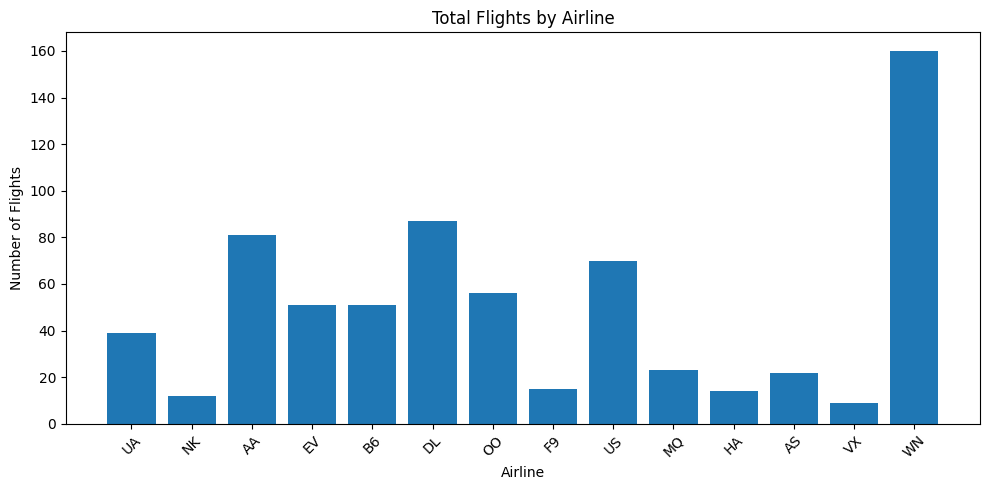

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(
    flights_by_airline_pd["AIRLINE"],
    flights_by_airline_pd["total_flights"]
)

plt.title("Total Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

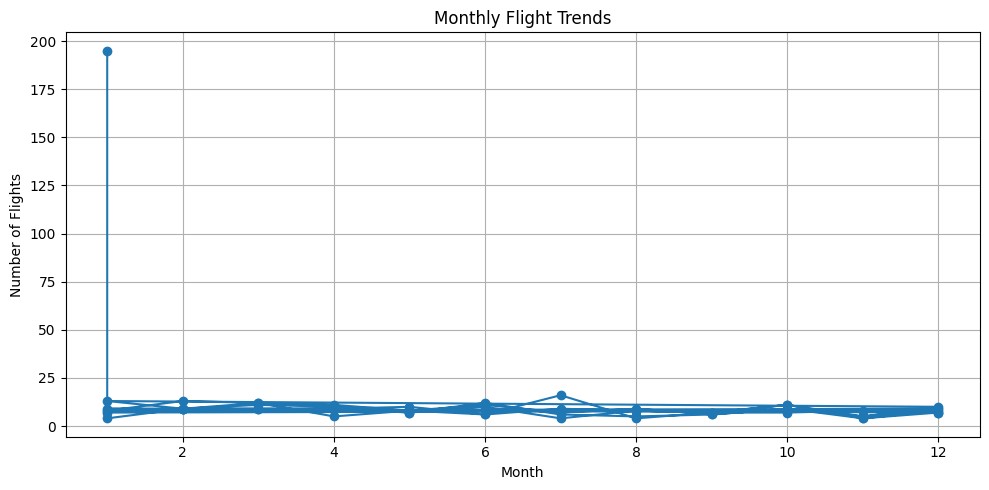

In [0]:
# Sort data for proper trend visualization
monthly_trends_pd = monthly_trends_pd.sort_values(["YEAR", "MONTH"])

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_trends_pd["MONTH"],
    monthly_trends_pd["monthly_flights"],
    marker="o"
)

plt.title("Monthly Flight Trends")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.tight_layout()
plt.show()

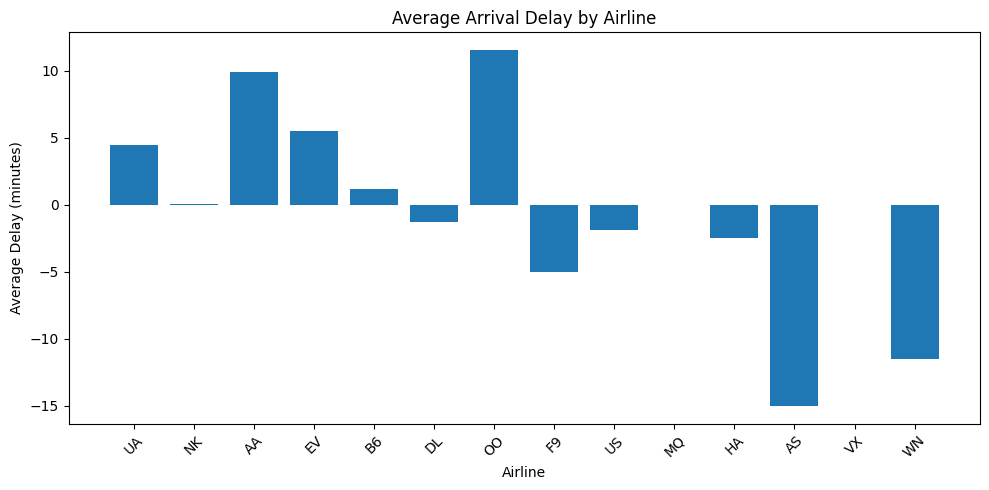

In [0]:
plt.figure(figsize=(10, 5))
plt.bar(
    delay_summary_pd["AIRLINE"],
    delay_summary_pd["avg_arrival_delay"]
)

plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

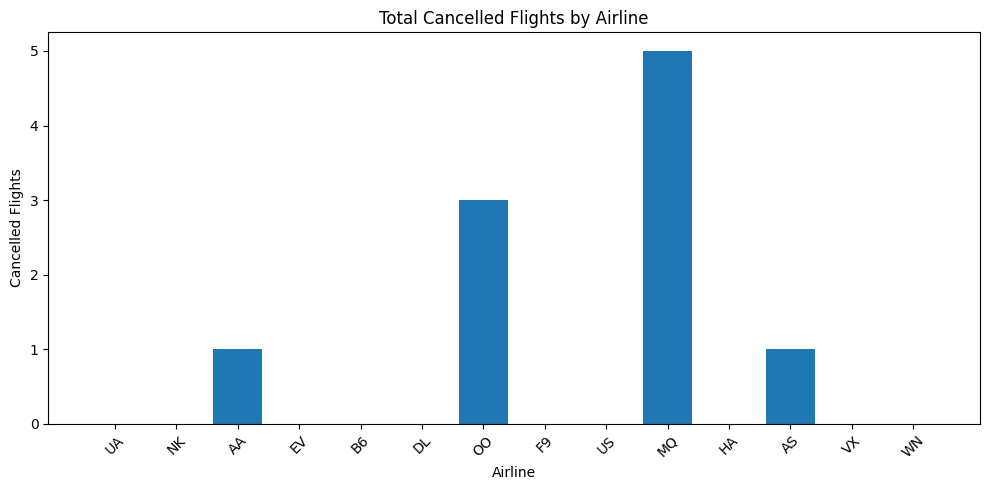

In [0]:
plt.figure(figsize=(10, 5))
plt.bar(
    delay_summary_pd["AIRLINE"],
    delay_summary_pd["total_cancelled_flights"]
)

plt.title("Total Cancelled Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Cancelled Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Sort monthly data for proper trend visualization
monthly_trends_pd = monthly_trends_pd.sort_values(
    ["YEAR", "MONTH"]
)

Text(0.5, 0.98, 'Aviation Insights Dashboard')

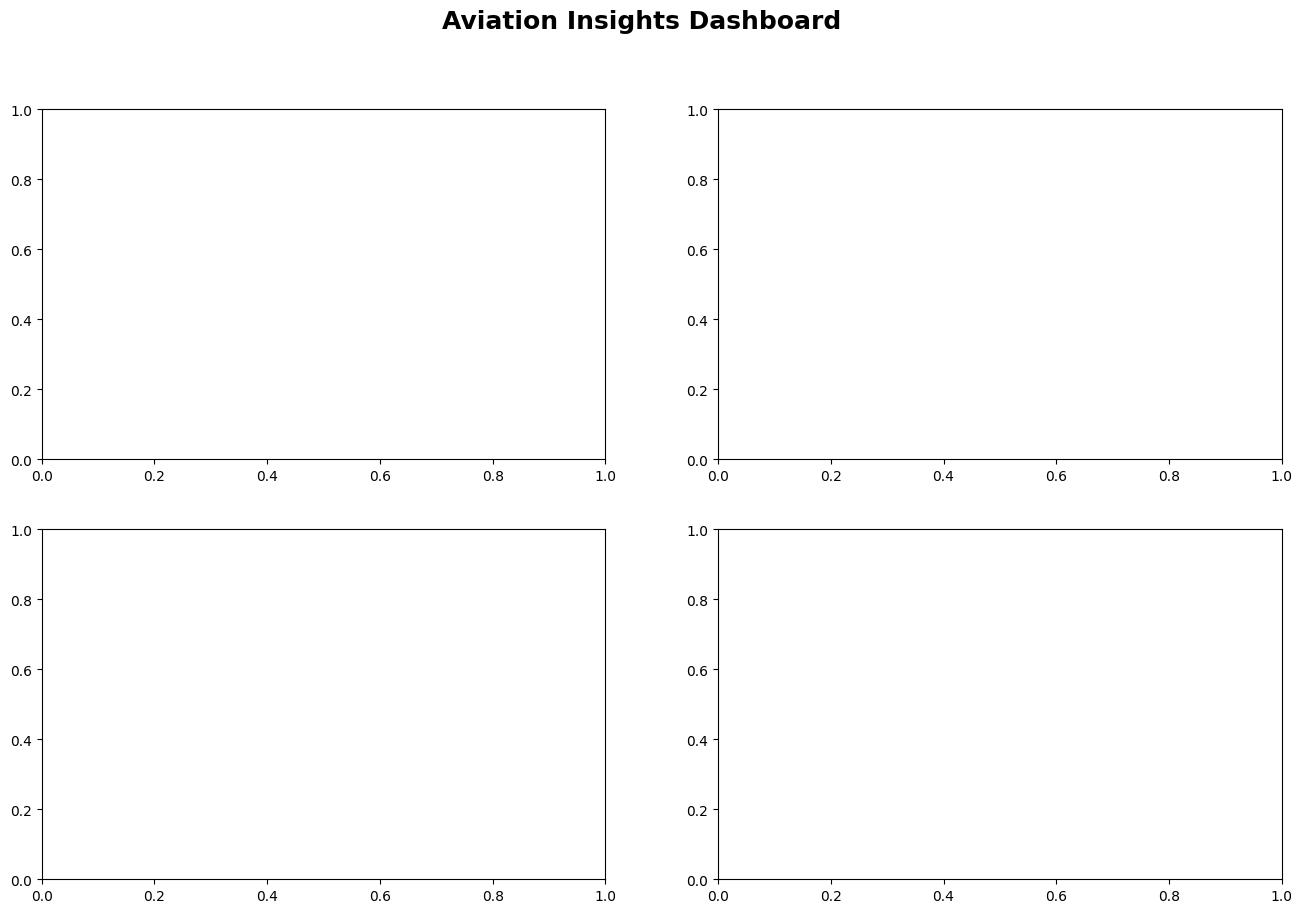

In [0]:
# Create a 2x2 grid (like a Power BI dashboard page)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

fig.suptitle(
    "Aviation Insights Dashboard",
    fontsize=18,
    fontweight="bold"
)

In [0]:
# ------------------------------------------------------------
# Top-left: Total Flights by Airline
# ------------------------------------------------------------

axes[0, 0].bar(
    flights_by_airline_pd["AIRLINE"],
    flights_by_airline_pd["total_flights"]
)

axes[0, 0].set_title("Total Flights by Airline")
axes[0, 0].set_xlabel("Airline")
axes[0, 0].set_ylabel("Flights")
axes[0, 0].tick_params(axis="x", rotation=45)

In [0]:
# ------------------------------------------------------------
# Top-right: Monthly Flight Trends
# ------------------------------------------------------------

axes[0, 1].plot(
    monthly_trends_pd["MONTH"],
    monthly_trends_pd["monthly_flights"],
    marker="o"
)

axes[0, 1].set_title("Monthly Flight Trends")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Flights")
axes[0, 1].grid(True)


In [0]:
# ------------------------------------------------------------
# Bottom-left: Average Arrival Delay by Airline
# ------------------------------------------------------------

axes[1, 0].bar(
    delay_summary_pd["AIRLINE"],
    delay_summary_pd["avg_arrival_delay"]
)

axes[1, 0].set_title("Average Arrival Delay by Airline")
axes[1, 0].set_xlabel("Airline")
axes[1, 0].set_ylabel("Avg Delay (minutes)")
axes[1, 0].tick_params(axis="x", rotation=45)


In [0]:
# ------------------------------------------------------------
# Bottom-right: Cancelled Flights by Airline
# ------------------------------------------------------------

axes[1, 1].bar(
    delay_summary_pd["AIRLINE"],
    delay_summary_pd["total_cancelled_flights"]
)

axes[1, 1].set_title("Cancelled Flights by Airline")
axes[1, 1].set_xlabel("Airline")
axes[1, 1].set_ylabel("Cancelled Flights")
axes[1, 1].tick_params(axis="x", rotation=45)

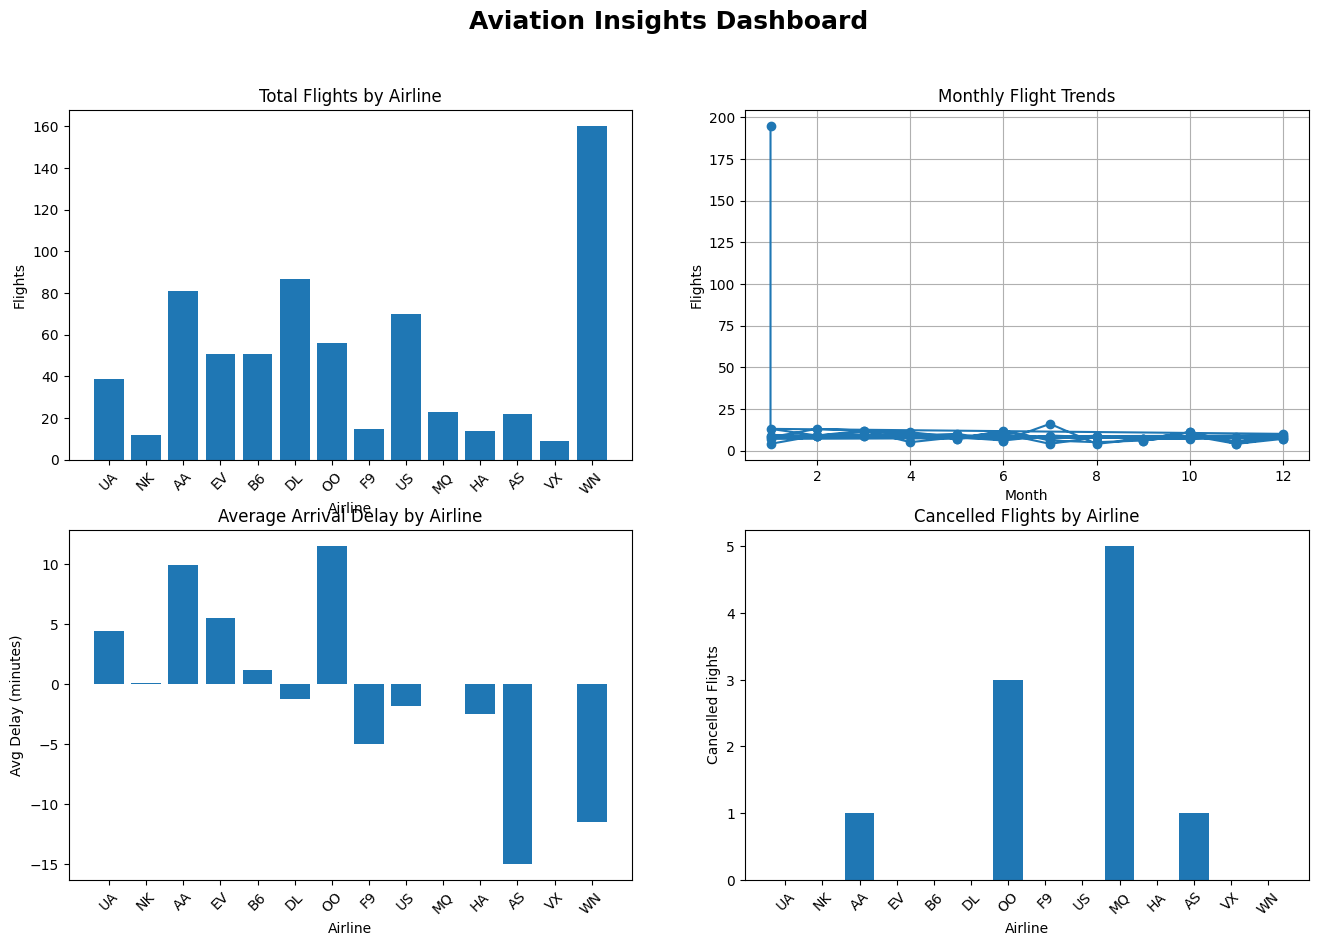

<Figure size 640x480 with 0 Axes>

In [0]:
# Adjust spacing so charts don't overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the combined dashboard
display(fig)

In [0]:
# Adjust spacing so charts don't overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the combined dashboard
plt.show()


<Figure size 640x480 with 0 Axes>